In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
ymin=350
ymax=-350
xmax=10
xmin=-110

Y=np.linspace(ymin,ymax,36)
X=np.linspace(xmin,xmax,25)
DY,DX=(Y[1]-Y[0])/2,(X[1]-X[0])/2
y,x=np.meshgrid(Y,X)

In [33]:
w=300 #300u
hy=-1/np.pi*(np.arctan((y+w/2)/x)-np.arctan((y-w/2)/x))#*1000/(4*np.pi)#/(2*w)
hx=-1/(2*np.pi)*np.log(((y+w/2)**2+x**2)/((y-w/2)**2+x**2))#*1000/(4*np.pi)#/(2*w)
h=np.abs(hx+1j*hy)
h=h/np.nanmax(h)
h[-3,10],h[-3,20]=1,1
#h=np.log10(h)*20
dy, dx = np.gradient(h)

<ipython-input-33-e3580243e2e8>:2: RuntimeWarning: divide by zero encountered in true_divide
  hy=-1/np.pi*(np.arctan((y+w/2)/x)-np.arctan((y-w/2)/x))#*1000/(4*np.pi)#/(2*w)
<ipython-input-33-e3580243e2e8>:2: RuntimeWarning: invalid value encountered in true_divide
  hy=-1/np.pi*(np.arctan((y+w/2)/x)-np.arctan((y-w/2)/x))#*1000/(4*np.pi)#/(2*w)
<ipython-input-33-e3580243e2e8>:3: RuntimeWarning: divide by zero encountered in true_divide
  hx=-1/(2*np.pi)*np.log(((y+w/2)**2+x**2)/((y-w/2)**2+x**2))#*1000/(4*np.pi)#/(2*w)
<ipython-input-33-e3580243e2e8>:3: RuntimeWarning: divide by zero encountered in log
  hx=-1/(2*np.pi)*np.log(((y+w/2)**2+x**2)/((y-w/2)**2+x**2))#*1000/(4*np.pi)#/(2*w)


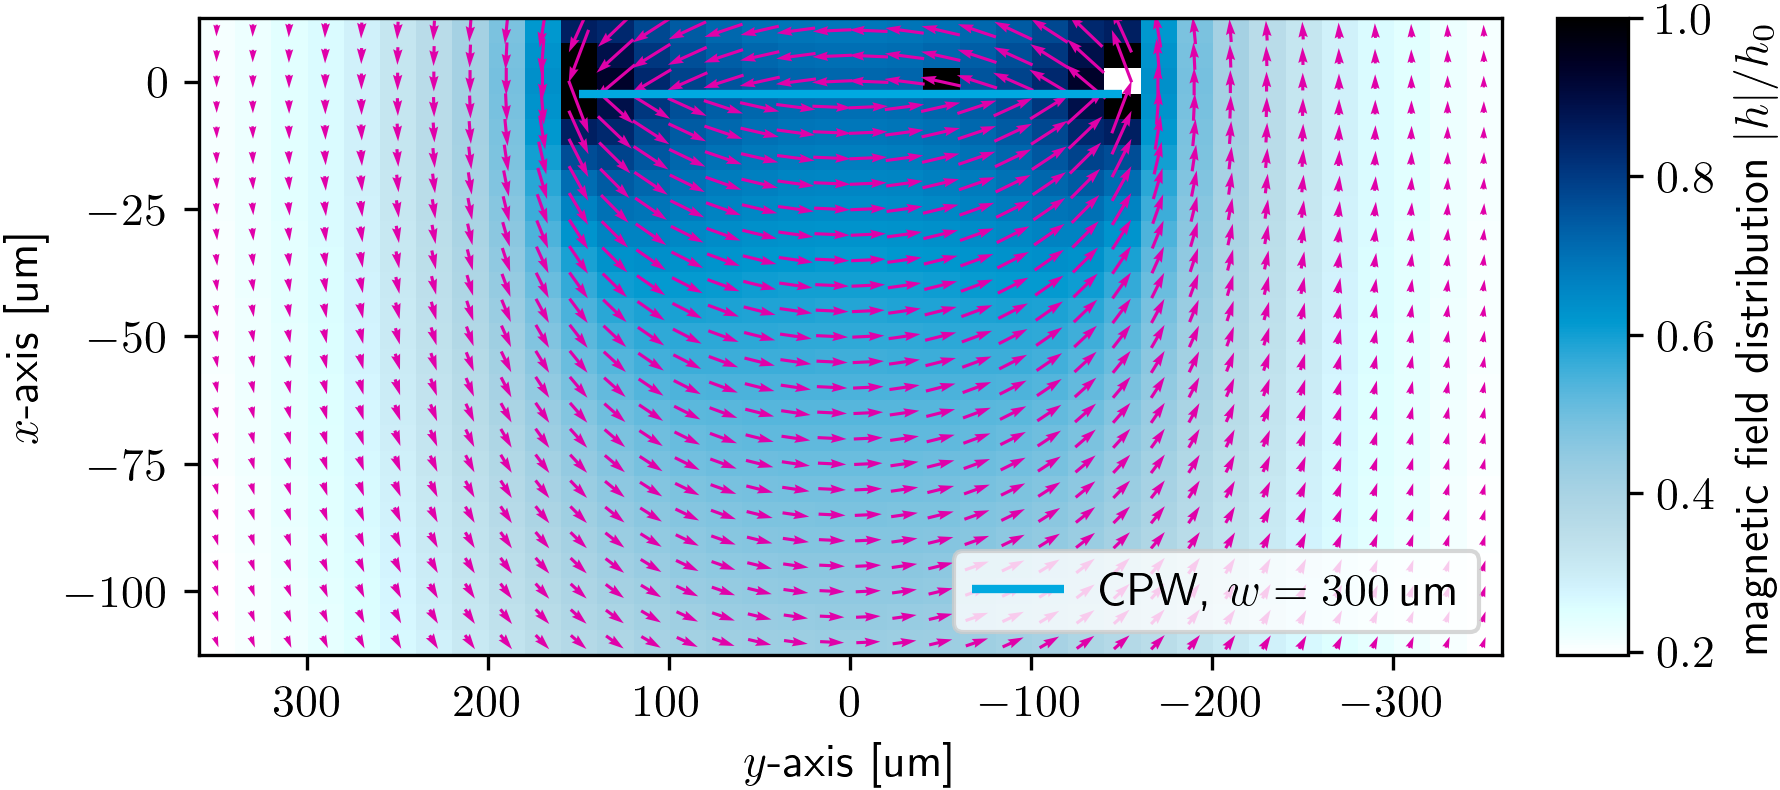

In [34]:
import corporate_design_colours_v3 as cpd
from matplotlib.colors import Normalize

plt.style.use('thesis_half.mplstyle')
colors = np.ravel(h)

norm = Normalize()
norm.autoscale(colors)

colormap = cpd.images(color='seeblau', inverse=True)

im=plt.imshow(h, extent=[ymin-DY,ymax+DY,xmin-DX,xmax+DX], origin='lower', aspect='auto',
              cmap=cpd.images(color='seeblau', inverse=True))
plt.quiver(y,x,hy,hx,color=cpd.curves(color='magenta')(1), pivot='mid')#, label='$h(x,y)$')
plt.hlines(0-(X[1]-X[0])/2,xmin=-w/2,xmax=w/2, color=cpd.curves()(0),lw=2, label='CPW, $w=300\,$um')


plt.colorbar(im, label='magnetic field distribution $|{h}|/h_0$')
plt.legend(loc=4)
plt.xlabel('$y$-axis [um]')
plt.ylabel('$x$-axis [um]')
np.nanmin(h),np.nanmax(h), ymin,ymax,xmin,xmax

plt.savefig('field.pgf')